<a href="https://colab.research.google.com/github/ZohebAbai/Deep-Learning-Projects/blob/master/Tensorflow_Keras/Mask_RCNN/Mask_RCNN_pretrained_COCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Libraries

Import Mask_RCNN library from [Matterport Github](thttps://github.com/matterport/Mask_RCNN/)

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Install mask_rcnn library

Edit setup.py file for colab to include Mak_RCNN folder name before the required files to install

In [ ]:
!python3 Mask_RCNN/setup.py install

Confirm library was installed

In [30]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


Dowmload weights trained on MSCOCO dataset

In [ ]:
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

## Load Model and Make Prediction

This class requires a configuration object as a parameter. The configuration object defines how the model might be used during training or inference.

In [ ]:
from Mask_RCNN.mrcnn.config import Config
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

In [ ]:
# define the model
from Mask_RCNN.mrcnn.model import MaskRCNN
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

In [ ]:
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)

Load the image and convert it to a NumPy array.

In [ ]:
# load photograph
!wget https://www.apartmentshowcase.com/blog/wp-content/uploads/2016/10/12077927.jpg 
from keras.preprocessing.image import load_img, img_to_array
img = load_img('12077927.jpg')
img = img_to_array(img)

In [ ]:
# make prediction
results = rcnn.detect([img], verbose=0)

The result contains a dictionary for each image that we passed into the detect() function, in this case, a list of a single dictionary for the one image.

The keys of the dictionary of note are as follows:

* ‘class_ids‘: The class integers for the detected objects.
* ‘masks‘: The masks for the detected objects.
* ‘rois‘: The bound boxes or regions-of-interest (ROI) for detected objects.
* ‘scores‘: The probability or confidence for each predicted class.

In [ ]:
# draw an image with detected objects
import matplotlib.pyplot as plt
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = plt.imread(filename)
     # plot the image
     plt.imshow(data)
     # get the context for drawing boxes
     ax = plt.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = plt.Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     plt.show()

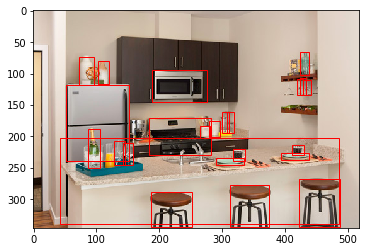

In [61]:
# visualize the results
draw_image_with_boxes('12077927.jpg', results[0]['rois'])

Now that we know how to load the model and use it to make a prediction, let’s update the example to perform real object detection.

That is, in addition to localizing objects, we want to know what they are.

The Mask_RCNN API provides a function called display_instances() that will take the array of pixel values for the loaded image and the aspects of the prediction dictionary, such as the bounding boxes, scores, and class labels, and will plot the photo with all of these annotations.

In [ ]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

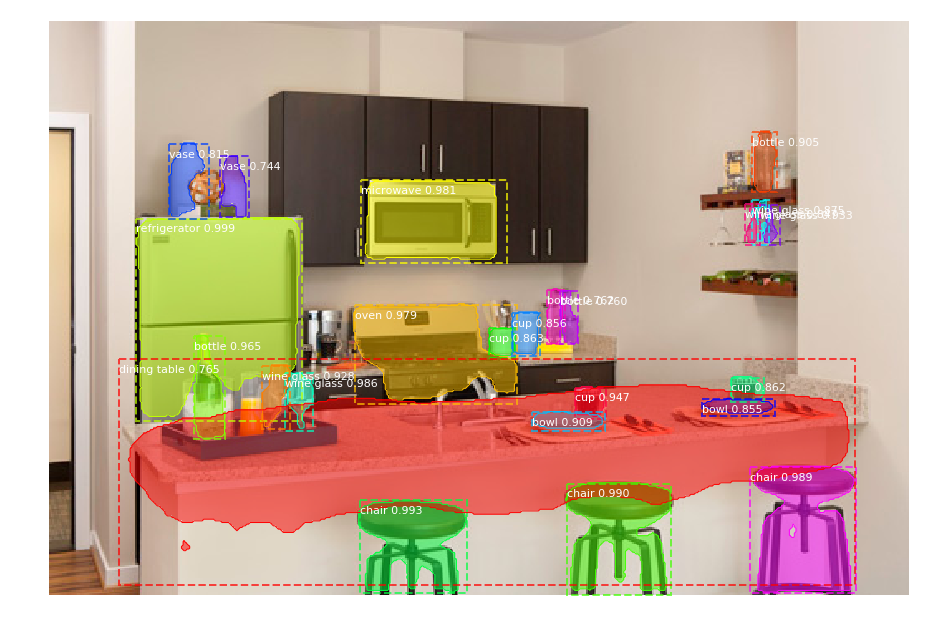

In [65]:
# get dictionary for first prediction
r = results[0]

# show photo with bounding boxes, masks, class labels and scores
from Mask_RCNN.mrcnn.visualize import display_instances
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])